In [1]:
import sys
print("Kernel: {}".format(sys.executable))
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
from scipy.sparse import csr_matrix 

pd.set_option('display.float_format',lambda x: '%.2f' %x)
seed = np.random.RandomState(seed=42)

Kernel: C:\Users\Rahil\WPy64-3680\python-3.6.8.amd64\python.exe


In [2]:
plays = pd.read_csv('user_artists.dat',sep='\t')
artists = pd.read_csv('artists.dat',sep='\t',usecols=['id','name'])
tags = pd.read_csv('tags.dat', sep='\t',encoding='latin-1')
uta = pd.read_csv('user_taggedartists.dat', sep='\t')
utat = pd.read_csv('user_taggedartists-timestamps.dat', sep="\t")
friends = pd.read_csv('user_friends.dat', sep='\t')

In [3]:
plays.head()

,userID,artistID,weight
0,2,51,13883
1,2,52,11690
2,2,53,11351
3,2,54,10300
4,2,55,8983


In [4]:
plays.describe()

,userID,artistID,weight
count,92834.00,92834.00,92834.00
mean,1037.01,3331.12,745.24
std,610.87,4383.59,3751.32
min,2.00,1.00,1.00
25%,502.00,436.00,107.00
50%,1029.00,1246.00,260.00
75%,1568.00,4350.00,614.00
max,2100.00,18745.00,352698.00


In [5]:
artists.head()

,id,name
0,1,MALICE MIZER
1,2,Diary of Dreams
2,3,Carpathian Forest
3,4,Moi dix Mois
4,5,Bella Morte


In [6]:
tags.head()

,tagID,tagValue
0,1,metal
1,2,alternative metal
2,3,goth rock
3,4,black metal
4,5,death metal


In [7]:
uta.head()

,userID,artistID,tagID,day,month,year
0,2,52,13,1,4,2009
1,2,52,15,1,4,2009
2,2,52,18,1,4,2009
3,2,52,21,1,4,2009
4,2,52,41,1,4,2009


In [8]:
utat.head()

,userID,artistID,tagID,timestamp
0,2,52,13,1238536800000
1,2,52,15,1238536800000
2,2,52,18,1238536800000
3,2,52,21,1238536800000
4,2,52,41,1238536800000


In [9]:
friends.head()

,userID,friendID
0,2,275
1,2,428
2,2,515
3,2,761
4,2,831


In [10]:
artists.describe()

,id
count,17632.00
mean,9156.64
std,5392.52
min,1.00
25%,4501.75
50%,9048.50
75%,13769.25
max,18745.00


In [11]:
tags.describe()

,tagID
count,11946.00
mean,6242.32
std,3667.50
min,1.00
25%,3036.25
50%,6210.50
75%,9460.75
max,12648.00


In [12]:
uta.describe()

,userID,artistID,tagID,day,month,year
count,186479.00,186479.00,186479.00,186479.00,186479.00,186479.00
mean,1035.60,4375.85,1439.58,1.10,6.52,2008.81
std,622.46,4897.79,2775.34,0.71,3.49,1.41
min,2.00,1.00,1.00,1.00,1.00,1956.00
25%,488.00,686.00,79.00,1.00,3.00,2008.00
50%,1021.00,2203.00,195.00,1.00,7.00,2009.00
75%,1624.00,6714.00,887.00,1.00,10.00,2010.00
max,2100.00,18744.00,12647.00,9.00,12.00,2011.00


In [13]:
utat.describe()

,userID,artistID,tagID,timestamp
count,186479.00,186479.00,186479.00,186479.00
mean,1035.60,4375.85,1439.58,1239203752024.53
std,622.46,4897.79,2775.34,42990907480.00
min,2.00,1.00,1.00,-428720400000.00
25%,488.00,686.00,79.00,1209592800000.00
50%,1021.00,2203.00,195.00,1243807200000.00
75%,1624.00,6714.00,887.00,1275343200000.00
max,2100.00,18744.00,12647.00,1304941497468.00


In [14]:
friends.describe()

,userID,friendID
count,25434.00,25434.00
mean,992.16,992.16
std,603.96,603.96
min,2.00,2.00
25%,441.00,441.00
50%,984.00,984.00
75%,1514.00,1514.00
max,2100.00,2100.00


In [15]:
datagab = pd.merge(artists, 
                plays, 
                how='inner',
                left_on='id',
                right_on='artistID')

datagab = datagab.rename(columns={"weight":"userArtistPlays"})

datagab.head()

,id,name,userID,artistID,userArtistPlays
0,1,MALICE MIZER,34,1,212
1,1,MALICE MIZER,274,1,483
2,1,MALICE MIZER,785,1,76
3,2,Diary of Dreams,135,2,1021
4,2,Diary of Dreams,257,2,152


In [16]:
artist_rank = (datagab.groupby(['name']).agg({'userID':'count','userArtistPlays':'sum'}).
    rename(columns={"userID":'totalUniqueUsers',"userArtistPlays":"totalArtistPlays"}).
              sort_values(['totalArtistPlays'],ascending=False))
artist_rank['avgUserPlays'] = artist_rank['totalArtistPlays']/artist_rank['totalUniqueUsers']
user_rank = (datagab.groupby(['userID']).agg({'name':'count','userArtistPlays':'sum'}).
    rename(columns={"name":'totalUniqueArtists',"userArtistPlays":"totalUserPlays"}).
            sort_values(['totalUserPlays'],ascending=False))

In [17]:
artist_rank.head()

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Britney Spears,522,2393140,4584.56
Depeche Mode,282,1301308,4614.57
Lady Gaga,611,1291387,2113.56
Christina Aguilera,407,1058405,2600.50
Paramore,399,963449,2414.66


In [18]:
artist_rank.describe()

,totalUniqueUsers,totalArtistPlays,avgUserPlays
count,17632.00,17632.00,17632.00
mean,5.27,3923.77,423.78
std,20.62,34099.34,785.38
min,1.00,1.00,1.00
25%,1.00,113.00,97.00
50%,1.00,350.00,246.00
75%,3.00,1234.25,496.88
max,611.00,2393140.00,35323.00


In [19]:
user_rank.head()

,totalUniqueArtists,totalUserPlays
userID,,
757,50,480039
2000,50,468409
1418,50,416349
1642,50,388251
1094,50,379125


In [20]:
datagab2 = datagab.join(artist_rank,on='name',how='inner')
datagab3 = datagab2.join(user_rank,on='userID',how='inner').sort_values(['userArtistPlays'],ascending=False)

assert datagab3[datagab3.duplicated(['userID','name'])].empty
datagab3.head()

,id,name,userID,artistID,userArtistPlays,totalUniqueUsers,totalArtistPlays,avgUserPlays,totalUniqueArtists,totalUserPlays
2800,72,Depeche Mode,1642,72,352698,282,1301308,4614.57,50,388251
35843,792,Thalía,2071,792,324663,26,350035,13462.88,50,338400
27302,511,U2,1094,511,320725,185,493024,2664.99,50,379125
8152,203,Blur,1905,203,257978,114,318221,2791.41,50,276295
26670,498,Paramore,1664,498,227829,399,963449,2414.66,50,251560


In [21]:
datagab3.tail()

,id,name,userID,artistID,userArtistPlays,totalUniqueUsers,totalArtistPlays,avgUserPlays,totalUniqueArtists,totalUserPlays
89571,15291,2gether,1552,15291,1,1,1,1.00,12,15
50373,1475,Ricky Martin,1552,1475,1,29,15647,539.55,12,15
31591,646,RBD,1552,646,1,73,44182,605.23,12,15
20149,349,The Pussycat Dolls,1810,349,1,233,130855,561.61,22,30193
88660,14367,Petey Pablo,1408,14367,1,1,1,1.00,50,85


In [22]:
def bar_chart_int(x,y,x_label,y_label,title,caption,total_val):
    fig, ax = plt.subplots()
    fig.set_size_inches(16, 5)
    ax = sns.barplot(x[:20], y[:20], palette="PuRd")
    ax.set_xlabel(x_label,fontweight='bold')
    ax.set_ylabel(y_label,fontweight='bold')
    ax.set_title(title,fontweight='bold')
    ax.get_yaxis().set_major_formatter(ticker.FuncFormatter(lambda x, p: '{:,}'.format(int(x))))

    # our bar label placement
    for p in ax.patches:
        height = p.get_height()
        pct = 100*(height/total_val)
        ax.text(p.get_x()+p.get_width()/2.,
                height + 3,
                '{:1.1f}%'.format(pct),
                ha="center",verticalalignment='bottom',color='red') 

    # our caption statement
    ax.text(19, max(y[:20])*0.95, caption, style='italic',fontsize=12,horizontalalignment='right')

    plt.xticks(rotation=90)
    plt.show()

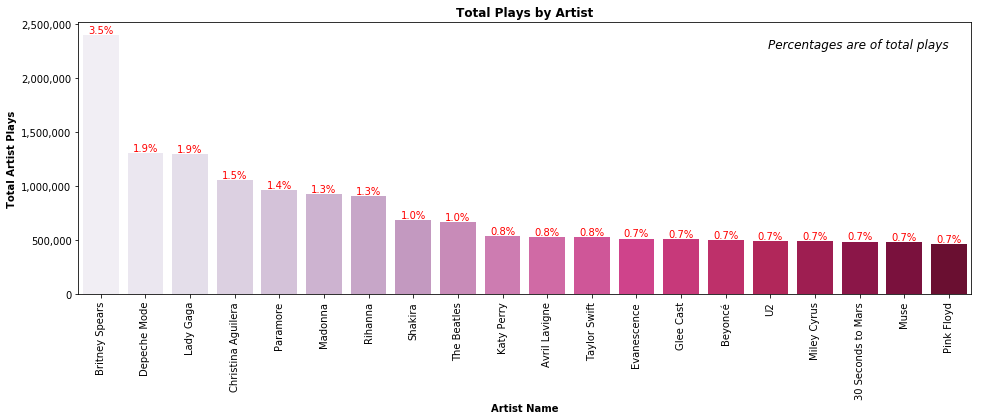

In [23]:
c1 = artist_rank
x = c1.index
y = c1.totalArtistPlays
x_label = 'Artist Name'
y_label = 'Total Artist Plays'
title = 'Total Plays by Artist'
caption = 'Percentages are of total plays'
total_val = c1.totalArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

In [24]:
artist_rank.sort_values(['totalUniqueUsers'],ascending=False).head()

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Lady Gaga,611,1291387,2113.56
Britney Spears,522,2393140,4584.56
Rihanna,484,905423,1870.71
The Beatles,480,662116,1379.41
Katy Perry,473,532545,1125.89


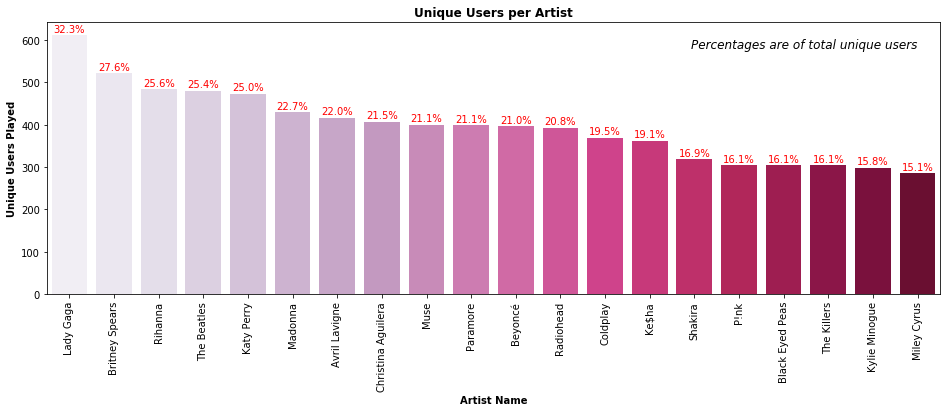

In [25]:
c2 = artist_rank.sort_values(['totalUniqueUsers'],ascending=False)
x = c2.index
y = c2.totalUniqueUsers
x_label = 'Artist Name'
y_label = 'Unique Users Played'
title = 'Unique Users per Artist'
caption = 'Percentages are of total unique users'
total_val = datagab3.userID.nunique()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

C:\Users\Rahil\WPy64-3680\python-3.6.8.amd64\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


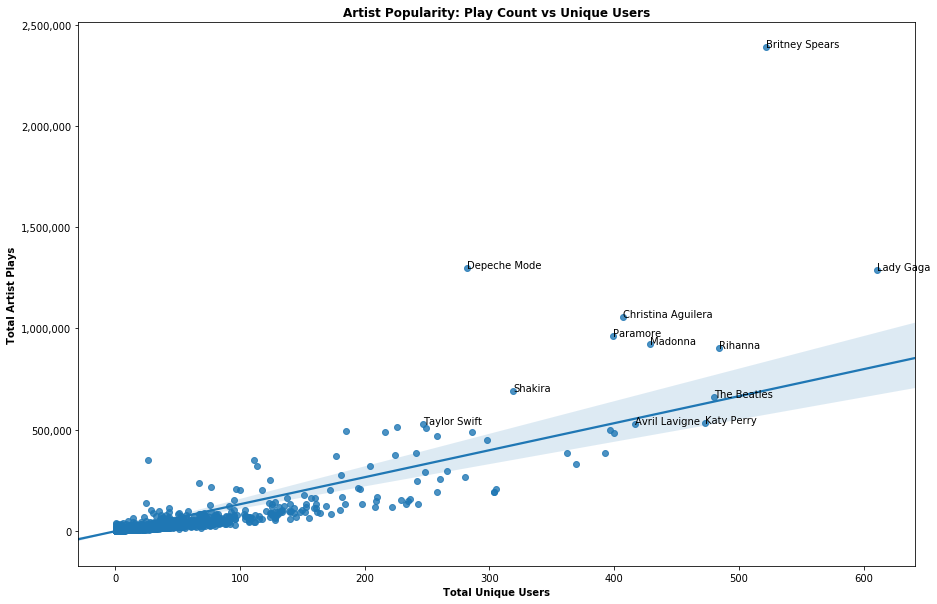

In [26]:
top_artists = artist_rank.sort_values(['totalArtistPlays'],ascending=False).index[:12]

x = artist_rank.totalUniqueUsers
y = artist_rank.totalArtistPlays
labels = artist_rank.index

fig, ax = plt.subplots(figsize=(15,10))
sns.regplot(x,y)
ax.set_title('Artist Popularity: Play Count vs Unique Users',fontweight='bold')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: '{:,.0f}'.format(y)))
ax.set_xlabel('Total Unique Users',fontweight='bold')
ax.set_ylabel('Total Artist Plays',fontweight='bold')

for i, t in enumerate(labels):
    if t in top_artists:
        ax.annotate(t,(x[i],y[i]))

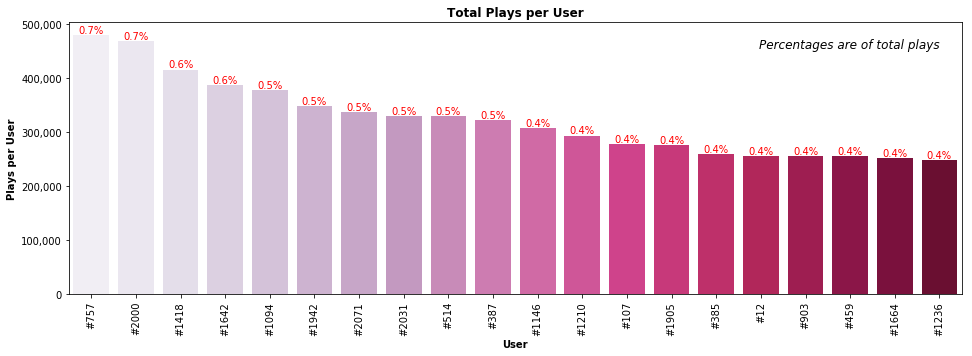

In [27]:
c3 = user_rank.sort_values(['totalUserPlays'],ascending=False)
c3['userID'] = c3.index
c3.userID = c3.userID.apply(lambda x: '#'+str(x))

x = c3.userID
y = c3.totalUserPlays
x_label = 'User'
y_label = 'Plays per User'
title = 'Total Plays per User'
caption = 'Percentages are of total plays'
total_val = datagab3.userArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

In [28]:
artist_rank.sort_values(['avgUserPlays'],ascending=False).head()

,totalUniqueUsers,totalArtistPlays,avgUserPlays
name,,,
Viking Quest,1,35323,35323.00
Tyler Adam,1,30614,30614.00
Rytmus,1,23462,23462.00
Johnny Hallyday,2,32995,16497.50
Dicky Dixon,1,15345,15345.00


In [29]:
datagab3[datagab3['name']=='Viking Quest']

,id,name,userID,artistID,userArtistPlays,totalUniqueUsers,totalArtistPlays,avgUserPlays,totalUniqueArtists,totalUserPlays
80046,8388,Viking Quest,596,8388,35323,1,35323,35323.00,50,101469


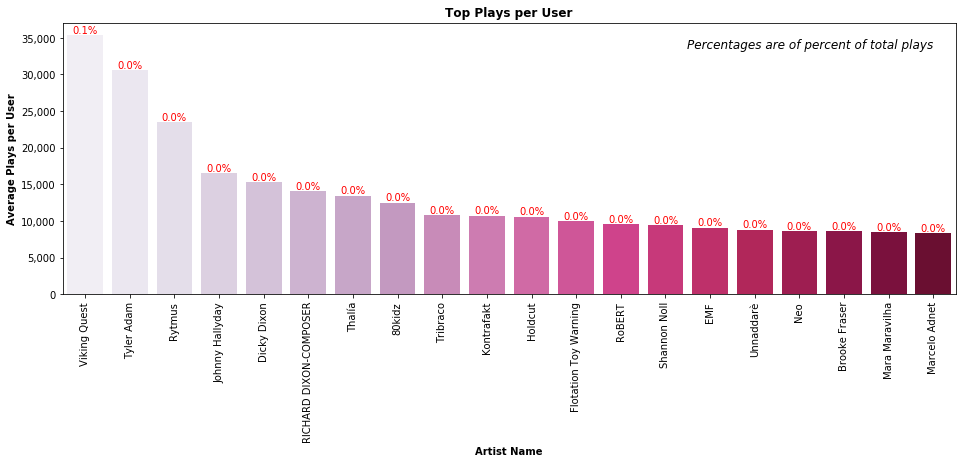

In [30]:
c4 = artist_rank.sort_values(['avgUserPlays'],ascending=False)

x = c4.index
y = c4.avgUserPlays
x_label = 'Artist Name'
y_label = 'Average Plays per User'
title = 'Top Plays per User'
caption = 'Percentages are of percent of total plays'
total_val = datagab3.userArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

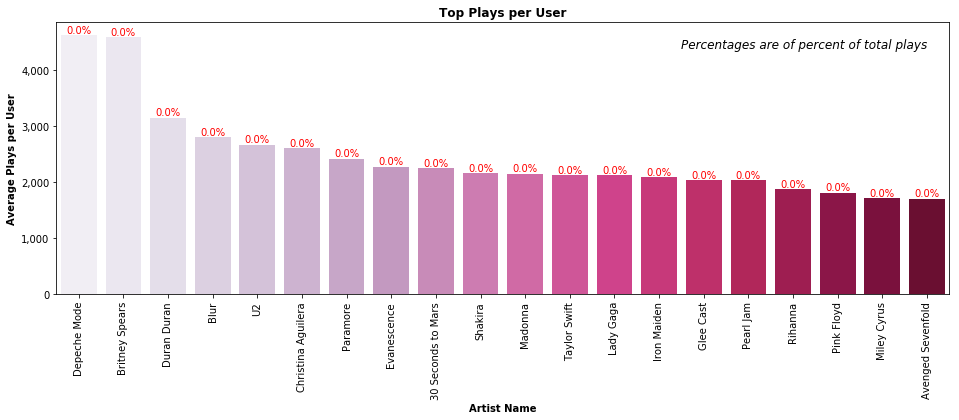

In [31]:
c5 = artist_rank[artist_rank['totalUniqueUsers']>100].sort_values(['avgUserPlays'],ascending=False)

x = c5.index
y = c5.avgUserPlays
x_label = 'Artist Name'
y_label = 'Average Plays per User'
title = 'Top Plays per User'
caption = 'Percentages are of percent of total plays'
total_val = datagab3.userArtistPlays.sum()

bar_chart_int(x,y,x_label,y_label,title,caption,total_val)

In [32]:
def data_to_sparse(data,index,columns,values):
    pivot = data.pivot(index=index,columns=columns,values=values).fillna(0)
    sparse = csr_matrix(pivot.values)
    print(sparse.shape)
    return pivot,sparse

In [33]:
pivot_datagab3,sparse_datagab3 = data_to_sparse(datagab3,index='name',columns='userID',values='userArtistPlays')

(17632, 1892)


In [34]:
pivot_datagab3

userID,2,3,4,5,6,7,8,9,10,11,...,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
name,,,,,,,,,,,,,,,,,,,,,
!!!,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
!DISTAIN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
!deladap,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
#####,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
#2 Orchestra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
$lick,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
$lick feat. Six-Fo,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
(1962-1966),0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
(Pre) Kingdom,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


<function matplotlib.pyplot.show(*args, **kw)>

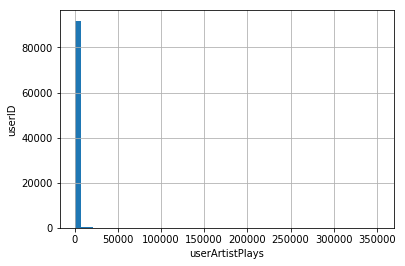

In [36]:
import matplotlib.pyplot as plt

datagab3['userArtistPlays'].hist(bins=50)
plt.xlabel('userArtistPlays')
plt.ylabel('userID')
plt.show

In [37]:
pivot_datagab3_norm = pivot_datagab3.apply(lambda x: (x-np.mean(x))/(np.max(x)-np.min(x)), axis=1)


# Drop all columns containing only zeros representing users who did not rate
pivot_datagab3_norm.fillna(0, inplace=True)
pivot_datagab3_norm = pivot_datagab3_norm.T
pivot_datagab3_norm = pivot_datagab3_norm.loc[:, (pivot_datagab3_norm != 0).any(axis=0)]

In [38]:
import scipy as sp

In [39]:
pivot_datagab3_sparse = sp.sparse.csr_matrix(pivot_datagab3_norm.values)

In [42]:
from sklearn.decomposition import NMF
model = NMF(n_components=1892, init='nndsvd', random_state=0)
W = model.fit_transform(sparse_datagab3)
H = model.components_
model.reconstruction_err_

15901.579015602605

In [43]:
print (W)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [44]:
print (H)

[[4.01664375 0.         7.76048284 ... 4.13779515 0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.19181024 0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.2071823  0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [45]:
nR = np.dot(W,H) #Prediksi
nR

array([[0.00000000e+00, 0.00000000e+00, 1.53966896e-02, ...,
        2.50058349e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.07039289e-02, 1.29825619e-04, 3.51663422e-04, ...,
        2.26449646e-02, 2.38645103e-01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [47]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pivot_datagab3, nR)

0.1863583920683119

In [48]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pivot_datagab3, nR))

print(rmse)

2.753143807791172


In [49]:
list_userID = list(pivot_datagab3.columns)
list_item = pivot_datagab3.index.tolist()
print(list_userID)

[2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 162, 163, 164, 166, 168, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 198, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 23

In [50]:
print(list_item)

['!!!', '!DISTAIN', '!deladap', '#####', '#2 Orchestra', '$lick', '$lick feat. Six-Fo', '(1962-1966)', '(Pre) Kingdom', '(We Are) Performance', '(hed) Planet Earth', '(sic)monic', '*NSYNC', '+44', '+\\-', '-123 min.', '-OZ-', '-t de sangre', '...And The Earth Swarmed With Them', '...And You Will Know Us by the Trail of Dead', '.38 Special', '.crrust', '06 Children Of The Cross', '08001', '1-800-ZOMBIE', '10 Years', '10-20 БЕЗ ВЫХОДНЫХ', '100 Bitches', '1000names', '100DEADRABBITS!!!', '100blumen', '100dBs', '10cc', '11.43', '110', '112', '1125', '12 Rounds', '12 Stones', '120 Days', '1200 Micrograms', '12012', '127 Band', '129- FLY PROJECT & TOM BOXER & ANCA PARGHEL', '12th Planet', '13', '1349', '13th Floor Elevators', '14 Bis', '14 Year Old Girls', '16 Horsepower', '16Volt', '16bit', '18th Dye', '19', '1910 Fruitgum Company', '1974 AD', '1990s', '1994!', '1997', '1SaGain', "2 0' Clock Girlfriend", '2 Brothers on the 4th Floor', "2 Many DJ's", "2 Skinnee J's", '2 Times Terror', '2 Unl

In [51]:
def pred_recomendation_usr(nR ,usr_idx, list_userID, list_produk, k):
    usr = list_userID[usr_idx]
    df = pd.DataFrame(nR, columns= list_userID, index= list_produk)
    df.sort_values(by=[usr], inplace=True, ascending=False)
    recom = df[usr].index.tolist()[:k]
    value_nmf = list(df[usr])
    print("Recommendations for user {}:\n".format(usr))
    for idx, dt in enumerate(recom):
        print('{0:.3}\t{1}'.format(float(value_nmf[idx]), dt))

In [52]:
pred_recomendation_usr(nR , 100, list_userID, list_item, 5)

Recommendations for user 105:

3.88e+02	Autechre
3.75e+02	Aphex Twin
3.64e+02	The Flashbulb
2.86e+02	Plaid
2.85e+02	Boards of Canada


In [76]:
pivot_datagab3.head()

userID,2,3,4,5,6,7,8,9,10,11,...,2090,2091,2092,2093,2094,2095,2096,2097,2099,2100
name,,,,,,,,,,,,,,,,,,,,,
!!!,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
!DISTAIN,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
!deladap,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
#####,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
#2 Orchestra,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [93]:
list_userID = list(pivot_datagab3.columns)
list_song = pivot_datagab3.index.tolist()
# print(userID)
# print(song)

In [190]:
def pred_recomendation_usr(nR ,usr_idx, list_userID, list_song, k):
    usr = list_userID[usr_idx]
    df = pd.DataFrame(nR, columns= list_userID, index= list_song[:100])
    df.sort_values(by=[usr], inplace=True, ascending=False)
    recom = df[usr].index.tolist()[:k]
    value_nmf = list(df[usr])
    print("Recommendations for {}:\n".format(usr))
    for idx, dt in enumerate(recom):
        print('{0:.3}\t{1}'.format(float(value_nmf[idx]), dt))

In [191]:
pred_recomendation_usr(nR ,100, list_userID, list_song, 5)

Recommendations for 105:

22.9	2H Company
6.04	32Crash
5.29	2562
5.1	12th Planet
4.96	3-11 Porter


In [1]:
query_index = pivot_datagab3.index.get_loc('2H Company')
pred_recomendation_usr(nR ,usr_idx, list_userID, list_song, 5)

NameError: name 'pivot_datagab3' is not defined

In [143]:
usr_idx = 30
usr = list_userID[usr_idx]
df = pd.DataFrame(nR, columns= list_userID, index= list_song[:100])
df.sort_values(by=[usr], inplace=True, ascending=False)
df[usr].index.tolist()[:5]

['2 Unlimited',
 '127 Band',
 '2ois',
 '...And You Will Know Us by the Trail of Dead',
 '311']

In [127]:
print(np.sort(nR[:,0],))

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.47474853e-12
 2.20551009e-08 3.78274050e-08 5.12349126e-08 2.28489777e-07
 2.69883585e-07 2.791440

In [105]:
predict.sort_values(by=, ascending=False)

KeyError: 0

In [ ]:
model.

In [77]:
data = datagab3.drop(['id','artistID','totalUniqueUsers','totalArtistPlays','avgUserPlays','totalUniqueArtists','totalUserPlays'], axis = 1)
data.head()

,name,userID,userArtistPlays
2800,Depeche Mode,1642,352698
35843,Thalía,2071,324663
27302,U2,1094,320725
8152,Blur,1905,257978
26670,Paramore,1664,227829


In [78]:
n_users = len(data['userID'].unique())
n_items = len(data['name'].unique())
data_shape = (n_users, n_items)
print (data_shape)

(1892, 17632)


In [79]:
X = data[['userID', 'name']].values
y = data['userArtistPlays'].values
print(X)
print(y)

[[1642 'Depeche Mode']
 [2071 'Thalía']
 [1094 'U2']
 ...
 [1552 'RBD']
 [1810 'The Pussycat Dolls']
 [1408 'Petey Pablo']]
[352698 324663 320725 ...      1      1      1]


In [64]:
from sklearn.model_selection import KFold

In [1]:
ls

 Volume in drive C has no label.
 Volume Serial Number is 3EA5-E85C

 Directory of C:\Users\Rahil\WPy64-3680\notebooks

29/02/2020  16:15    <DIR>          .
29/02/2020  16:15    <DIR>          ..
27/02/2020  10:41    <DIR>          .ipynb_checkpoints
13/01/2020  12:19           100.128 A_start25.npy
23/11/2019  13:04           137.285 Anime data NMF.ipynb
19/11/2019  12:36           936.463 anime.csv
11/05/2011  23:01         1.925.879 artists.dat
20/09/2019  22:05        16.665.883 book_tags.csv
20/09/2019  22:05         3.296.741 books.csv
14/11/2019  14:57            14.755 Change_format_csv.ipynb
02/01/2020  11:00            26.112 Collab Filtering Prwdk.ipynb
11/01/2020  12:50            36.099 collaborative-filtering-on-anime-data.ipynb
30/01/2020  13:41            32.667 collaborative-filtering-on-anime-data-Copy1.ipynb
13/01/2020  11:25            42.923 collaborative-filtering-on-anime-data-Copy2.ipynb
20/09/2019  19:35       495.032.008 combined_data_1.txt
20/09/2019  19:35 

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

datagab3_train = data_to_sparse(X_train, y_train, datagab3_shape ,)
datagab3_test = data_to_sparse(X_test, y_test, datagab3_shape)

print (datagab3_train)
print (datagab_test)

TypeError: data_to_sparse() missing 1 required positional argument: 'values'

In [45]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(pivot_datagab3, nR)

0.18635839206462376

In [49]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(pivot_datagab3, nR))

print(rmse)

2.7531438077868837


In [3]:
def save_model(model ,filename):
    try:
        with open(filename,'wb') as file:
            pickel.dump(model, file)
        return 1
    except Exception as err:
        print(err)
        return 0

In [1]:
def load_model(filename):
    try:
        result = pickle.load(open(filename, 'rb'))
        return result
    except Exception as err:
        print (err)
        return 0

In [6]:
model = load_model(filename)

In [4]:
import pickle
filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))

In [5]:
import pickle
filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'rb'))

In [3]:
print(filename)

finalized_model.sav


In [4]:
H.shape

NameError: name 'H' is not defined

In [92]:
W.shape

(17632, 1892)

In [3]:
nR = np.dot(W,H)

NameError: name 'np' is not defined

In [94]:
nR

array([[0.00000000e+00, 0.00000000e+00, 1.53966896e-02, ...,
        2.50058355e-01, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.07039289e-02, 1.29825619e-04, 3.51663422e-04, ...,
        2.26449646e-02, 2.38645101e-01, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

In [90]:
from sklearn.metrics import mean_absolute_error

In [74]:
mean_absolute_error(pivot_datagab3, nR)

0.18635839207255225

In [64]:
from sklearn.metrics.pairwise import cosine_similarity

In [65]:
item_similarity = cosine_similarity(pivot_datagab3_sparse)
user_similarity = cosine_similarity(pivot_datagab3_sparse.T)